<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/9_b_Keras_Fictional_Exprimental_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [59]:
train_labels=[]
train_samples=[]


In [60]:
# 1. Randomly generate observations and labels
# with side-effect: 1,  without side-effect: 0

for i in range(100):
    # The younger individuals who did experience side effects
    random_younger= randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #Old who did not expereince side effects
    random_older= randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(20000):
    #95% of younger did not have side effects
    random_younger=randint(16,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [61]:
print(len(train_labels), len(train_samples))


40200 40200


In [62]:
# 2. Transform list to np.arrays and scale

train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))


In [63]:
#check to make sure it is the right type
type(scaled_train_samples)

numpy.ndarray

In [64]:
#check to make sure it is in the right format
scaled_train_samples

array([[0.31034483],
       [0.71264368],
       [0.35632184],
       ...,
       [0.10344828],
       [0.49425287],
       [0.27586207]])

In [65]:
#2. Build the model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [66]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0], True)


Num GPUs Available:  1


In [67]:
model=Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')                  
])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [71]:
# 3. train the model--validation set 0.1  --shuffle=True
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=5, verbose=2)

Epoch 1/5
3618/3618 - 6s - loss: 0.0486 - accuracy: 0.9950 - val_loss: 0.0533 - val_accuracy: 0.9950
Epoch 2/5
3618/3618 - 6s - loss: 0.0478 - accuracy: 0.9950 - val_loss: 0.0526 - val_accuracy: 0.9950
Epoch 3/5
3618/3618 - 6s - loss: 0.0470 - accuracy: 0.9949 - val_loss: 0.0513 - val_accuracy: 0.9950
Epoch 4/5
3618/3618 - 6s - loss: 0.0461 - accuracy: 0.9950 - val_loss: 0.0507 - val_accuracy: 0.9950
Epoch 5/5
3618/3618 - 6s - loss: 0.0454 - accuracy: 0.9950 - val_loss: 0.0494 - val_accuracy: 0.9950


## PREDICTION: THE MODEL ON THE NEW TESTSET

In [72]:
#test on the new dataset
#1. create the test set.

test_labels=[]
test_samples=[]

for i in range(1000):
    # The younger individuals who did experience side effects
    random_younger= randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #Old who did not expereince side effects
    random_older= randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(20000):
    #95% of younger did not have side effects
    random_younger=randint(16,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older=randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)


In [73]:
# 2. Transform list to np.arrays and scale

test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)


In [74]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

In [75]:
print(type(test_labels), type(test_samples))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [77]:
len(scaled_test_samples)

42000

In [78]:
#Run the model on the predictions

In [79]:
predictions=model.predict(x=scaled_test_samples, batch_size=10)

In [ ]:
for i in predictions:
    print(i)

In [81]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [82]:
val_loss2, val_acc2=model.evaluate(scaled_test_samples, test_labels)
print(val_loss2, val_acc2)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.9524
0.29440081119537354 0.9523809552192688


In [83]:
#Confusion Matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [84]:
cm=confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [55]:
#copied from scikiLearn library for cofusion matrix

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, npnewaxis]
        print("Normalized confusion maxtrix")
    else:
        print('Confusion Matrix, without normalization')
    print(cm)

    thresh=cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                   horizontalalignment='center',
                   color='white' if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion Matrix, without normalization
[[20000  1000]
 [ 1000 20000]]


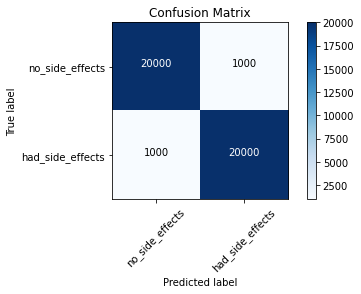

In [85]:
cm_plot_labels=['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')